In [1]:
import ee
ee.Initialize()

In [2]:
from iteru import *

In [3]:
from matplotlib import pyplot as plt

In [4]:
Map = Map()
Map

Map(center=[27, 31], controls=(AttributionControl(options=['position', 'prefix'], position='bottomright'), Sea…

In [5]:
aoi = GERD_aoi

In [6]:
SAR = SAR = ee.ImageCollection('COPERNICUS/S1_GRD')\
    .filter(ee.Filter.equals('relativeOrbitNumber_start', 50))\
    .filter(ee.Filter.eq('instrumentMode', 'IW'))\
    .filter(ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))\
    .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH'))\
    .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VV'))\
    .filter(ee.Filter.eq('resolution_meters',10))\
    .filterBounds(aoi)\
    .filterDate('2022-01-01','2022-03-10')\
    .select(['VV','VH']).median()

In [7]:
Map.add_layer_widgets(SAR,{'min':-38.45,'max':5.07,'bands':['VH']},'SAR')

In [8]:
SARF = ee.Image(toDB(RefinedLee(toNatural(SAR))))

In [9]:
Map.add_layer_widgets(SARF,{'min':-31,'max':5,'bands':['sum']},'SARF')

In [10]:
histogram = SAR.select('VH').reduceRegion(
        reducer = ee.Reducer.histogram(255, 2).combine('mean', None, True).combine('variance', None, True),
        geometry = aoi,
        scale =10,
        bestEffort = True,
)

In [11]:
hist_dict = histogram.getInfo()

In [15]:
x = hist_dict['VH_histogram']['bucketMeans']
y = hist_dict['VH_histogram']['histogram']

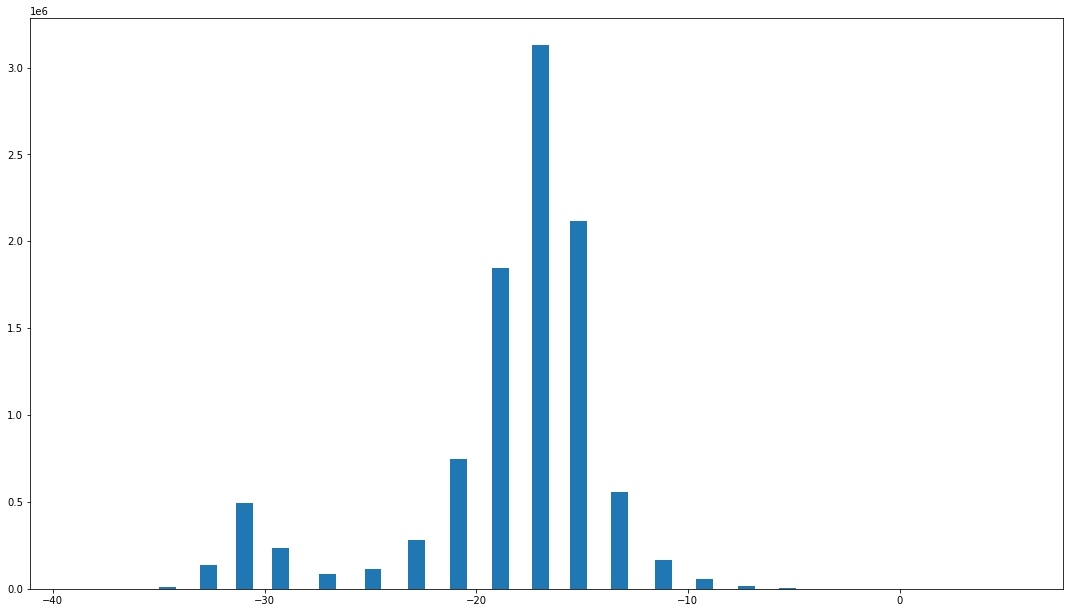

In [16]:
plt.bar(x,y)
plt.gcf().set_size_inches(18.5,10.5)

In [14]:
hist_dict

{'VH_histogram': {'bucketMeans': [-38.45357531737168,
   -36.53030474951714,
   -34.57180263790291,
   -32.64102563698643,
   -30.955995822815563,
   -29.230367842460282,
   -27.047583186068664,
   -24.877427580136175,
   -22.840215790807957,
   -20.841951071197336,
   -18.865255832346307,
   -16.970949001281003,
   -15.168078415985262,
   -13.235623357444974,
   -11.162155329878845,
   -9.197762282470789,
   -7.243508355164159,
   -5.309388304761836,
   -3.2570940624377958,
   -1.3306928706862495,
   0.9185195469578507,
   2.588979706015654,
   5.075892687126142],
  'bucketMin': -40,
  'bucketWidth': 2,
  'histogram': [18,
   462,
   9650,
   136199.25098039216,
   493620.85882352944,
   233897.22352941177,
   82861.1294117647,
   116285.82352941176,
   282462.7529411764,
   749609.7137254904,
   1845384.098039215,
   3128368.431372544,
   2118701.4941176474,
   559222.439215686,
   166786.168627451,
   58396.882352941204,
   15099.439215686274,
   2602.992156862745,
   342.4941176470